<a href="https://colab.research.google.com/github/krakowiakpawel9/convnet-course/blob/master/basics/Untitled40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Implementacja prostej sieci neuronowej 


In [0]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()


def plot_decision_boundary(pred_func):
    """
    Funkcja zwraca wykres zawierający granice decyzyjne wytrenowanego modelu.
    """
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 
    h = 0.01 
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 

    Z = pred_func(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral) 
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

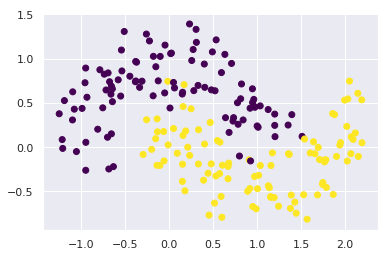

In [0]:
X, y = make_moons(200, noise=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

### Regresja Logistyczna

In [0]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

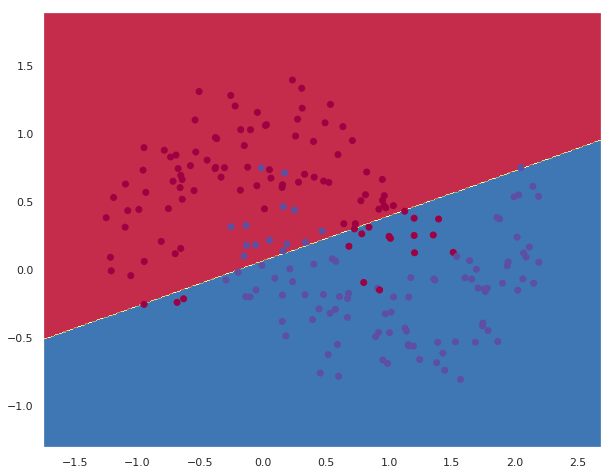

In [0]:
plt.figure(figsize=(10, 8))
plot_decision_boundary(lambda X: log_reg.predict(X))

### Implementacja sieci

$A1 = h(W1*X + b1)$

$A2 = g(W2*A1 + b2)$

In [0]:
import numpy as np


def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

def initialize_parameters(n_x, n_h, n_y):
    """
    Inicjalizacja parametrów.
    """
    W1 = np.random.randn(n_x, n_h)
    b1 = np.zeros((1, n_h))
    W2 = np.random.randn(n_h, n_y)
    b2 = np.zeros((1, n_y))
    
    parameters = {"W1": W1, 'b1': b1, 'W2': W2, 'b2': b2}
    
    return parameters

def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(X, W1) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    print('Z1', Z1.shape)
    print('Z2', Z2.shape)
    
    cache = {'A1': A1, 'A2': A2}
    
    return A2, cache

def calculate_cost(A2, Y):
    A2 = np.clip(A2, 0.0000001, 1-0.000001)
    cost = -np.sum(np.multiply(Y, np.log(A2)) + np.multiply(1- Y, np.log(1-A2)))
    cost = np.squeeze(cost)
    
    return cost

    
def backward_propagation(X, Y, cache, parameters):
    A1 = cache['A1']
    A2 = cache['A2']
    
    W2 = parameters['W2']
    
    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}
    
    return grads

def update_parameters(parameters, grads, learning_rate):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    new_parameters = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    
    return new_parameters

def model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate):
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(0, num_of_iters):
        a2, cache = forward_propagation(X, parameters)
        
        cost = calculate_cost(a2, Y)
        
        grads = backward_propagation(X, Y, cache, parameters)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i % 100 == 0:
            print('Koszt po iteracji #{}: {}'.format(i, cost))
            
    return parameters

In [0]:

model(X, y, 2, 3, 1, 1000, 0.3)

Z1 (200, 3)
Z2 (200, 1)


ValueError: ignored